In [7]:
using LinearAlgebra
using PyPlot
using HF0d

In [8]:
U0, U1 = 30, 15
δ=0.075
Nf1,Nf2,Nf = 8,8,16
hfm = HFmodel_supermoire(1000;δ);

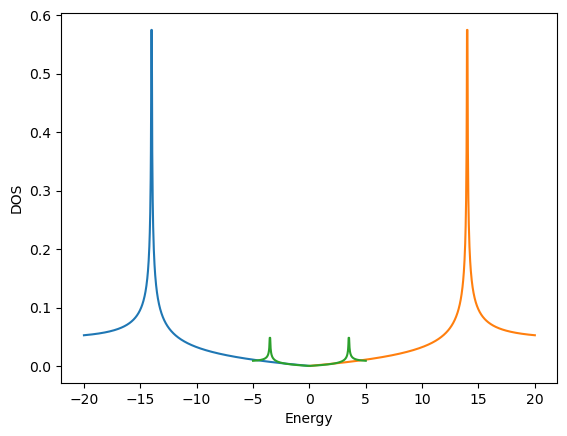

PyObject Text(24.000000000000007, 0.5, 'DOS')

In [9]:
plot(hfm.ϵs[1],hfm.ρs[1],label="Hole band")
plot(hfm.ϵs[5],hfm.ρs[5],label="Electron band")
plot(hfm.ϵs[9],hfm.ρs[9],label="Supermoier band")
xlabel("Energy")
ylabel("DOS")

# Run Optimization --- takes a few minutes

In [23]:
#list of chemical potentials
μs = 100:0.5:250
#run HF --- takes a few minutes
repeats = 5 #to get global minimum
@time νsopt, Φsopt = run_HF(μs,hfm,repeats);

μ = 104.5 (10/301)
μ = 109.5 (20/301)
μ = 114.5 (30/301)
μ = 119.5 (40/301)


┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148


μ = 124.5 (50/301)
μ = 129.5 (60/301)
μ = 134.5 (70/301)
μ = 139.5 (80/301)


┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148


μ = 144.5 (90/301)
μ = 149.5 (100/301)
μ = 154.5 (110/301)
μ = 159.5 (120/301)
μ = 164.5 (130/301)
μ = 169.5 (140/301)
μ = 174.5 (150/301)
μ = 179.5 (160/301)
μ = 184.5 (170/301)
μ = 189.5 (180/301)
μ = 194.5 (190/301)
μ = 199.5 (200/301)
μ = 204.5 (210/301)
μ = 209.5 (220/301)
μ = 214.5 (230/301)
μ = 219.5 (240/301)
μ = 224.5 (250/301)
μ = 229.5 (260/301)
μ = 234.5 (270/301)
μ = 239.5 (280/301)
μ = 244.5 (290/301)
μ = 249.5 (300/301)
104.551438 seconds (21.29 M allocations: 869.296 MiB, 0.09% gc time)


In [28]:
#rearrange and sort data 
νsopt2 = stack(νsopt)
νsopt2[1:Nf1,:] .= sort(νsopt2[1:Nf1,:],dims=1)
νsopt2[Nf1+1:Nf,:] .= sort(νsopt2[Nf1+1:Nf,:],dims=1)

#compute numerical derivative dmu/dn
νstot, κs = compressibility(μs, νsopt2; smooth=2, cutoff=1/50)
νstot .-= 4; #make range nu = [0,4]

μs2 = μs .- μs[1] #set μ(ν=0) = 0

0.0:0.5:150.0

# Plot Everything

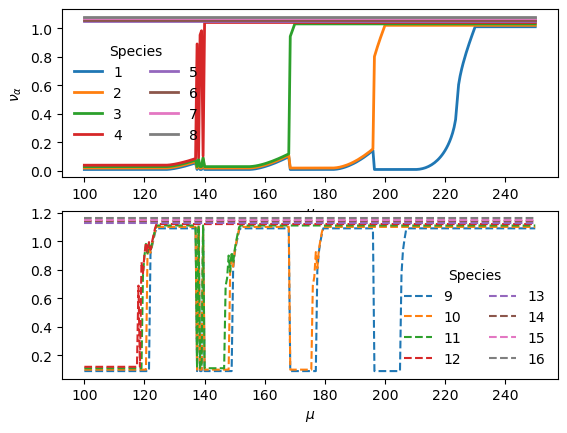

PyObject <matplotlib.legend.Legend object at 0x299d7e910>

In [29]:
#moire fillings
fig, axs = subplots(2,1)
for α in 1:Nf1
    offset = 0.01*α
    axs[1].plot(μs,offset .+ νsopt2[α,:] * (1/(1-δ)),lw=2,label=α)
end
axs[1].set_xlabel(L"$\mu$")
axs[1].set_ylabel(L"$\nu_{\alpha}$")
axs[1].legend(ncol=2,title="Species",frameon=false)

#supermoire fillings
for (n,α) in enumerate(Nf1+1:Nf)
    offset = 0.01*α
    axs[2].plot(μs,offset .+ νsopt2[α,:]*(1/(δ)),ls="--",label=α)
end
axs[2].set_xlabel(L"$\mu$")
axs[1].set_ylabel(L"$\nu_{\alpha}$")
axs[2].legend(ncol=2,title="Species",frameon=false)


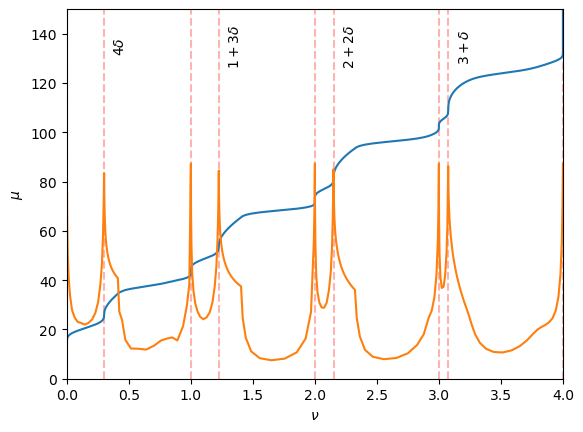

(0.0, 4.0)

In [35]:
plot(νstot, μs2[1:end-1])
plot(νstot, 1 ./ κs)

for x in [0,1,2,3,4, 0+4*δ, 1+3*δ,2+2*δ,3+δ]
    axvline(x,color=(1,0,0,0.3),ls="--",zorder=-1)
end

ycoord = 125
text(0+5*δ,ycoord+10,L"$4\delta$",rotation=90,va="center")
text(1+4*δ,ycoord+10,L"$1+3\delta$",rotation=90,va="center")
text(2+3*δ,ycoord+10,L"$2+2\delta$",rotation=90,va="center")
text(3+2*δ,ycoord+10,L"$3+\delta$",rotation=90,va="center")

xlabel(L"$\nu$")
ylabel(L"$\mu$")

ylim(0,150)
xlim(0,4)